# Data analysis for OD turning project timeseries accelerometer data

Author: Yaolin Ge
Email: geyaolin@gmail.com
Date: 2023-11-22

In [42]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import seaborn as sns
from usr_func import checkfolder

In [5]:
datapath = os.path.join(os.getcwd(), "data_od.csv")
df = pd.read_csv(datapath, sep="\t")
adc = df.iloc[:, -1].to_numpy()
adc = adc.reshape(-1, 1)
timestamp = df.iloc[:, 0].to_numpy()
fs = int(1 / np.mean(np.diff(timestamp)))
time_window = 5

def segment_data(data, time_window): 
    """
    Segment the data according to the interval of time_window seconds. 
    """
    n = int(time_window * fs)
    data = data[:n * (len(data) // n)]
    data = data.reshape(-1, n)
    return data

In [6]:
data_seg = segment_data(adc, time_window)

In [7]:
data_seg.shape

(22, 2005)

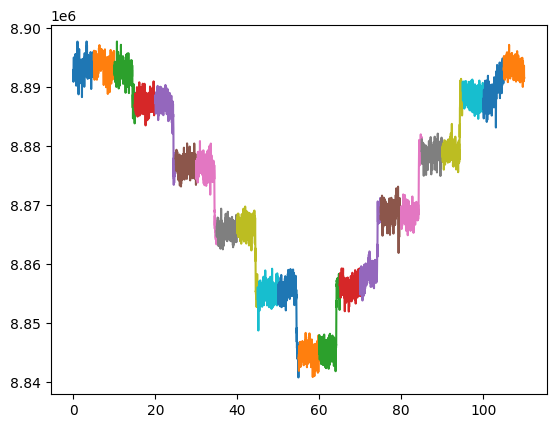

In [8]:
for i in range(data_seg.shape[0]): 
    t_range = np.arange(i * time_window, (i + 1) * time_window, 1 / fs)
    plt.plot(t_range, data_seg[i, :])
plt.show()

In [22]:
fft_values = np.fft.fft(data_seg[0, :])

In [23]:
fft_freq = np.fft.fftfreq(data_seg[0, :].shape[0], 1 / fs)

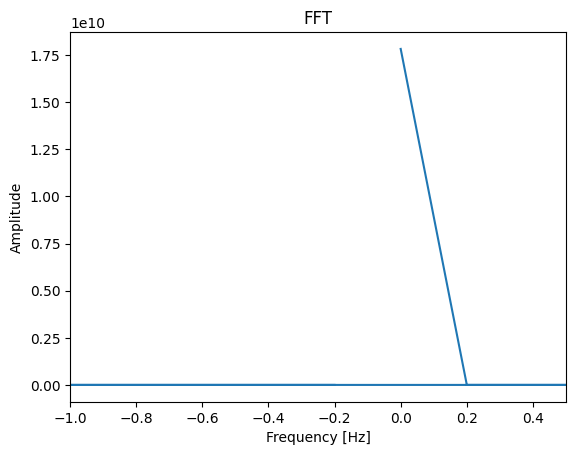

In [24]:
plt.plot(fft_freq, np.abs(fft_values))
plt.title("FFT")
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.xlim([-1, .5])
plt.show()

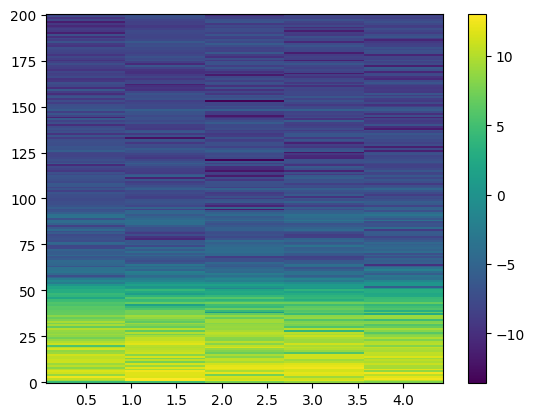

In [41]:
# plot colormesh for the Sxx 
f, t, Sxx = signal.spectrogram(data_seg[0, :], fs=fs, nperseg=fs)
plt.pcolormesh(t, f, np.log(Sxx))
plt.colorbar()

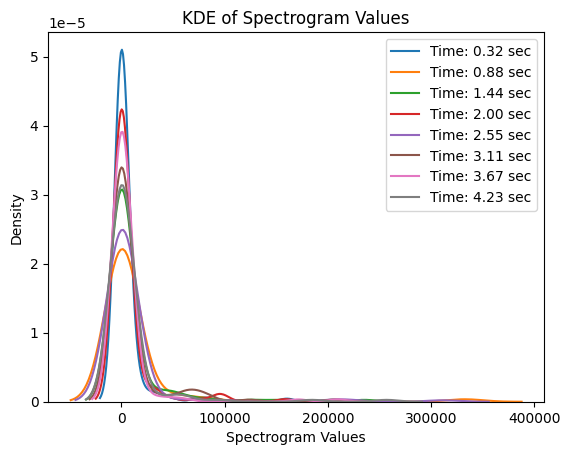

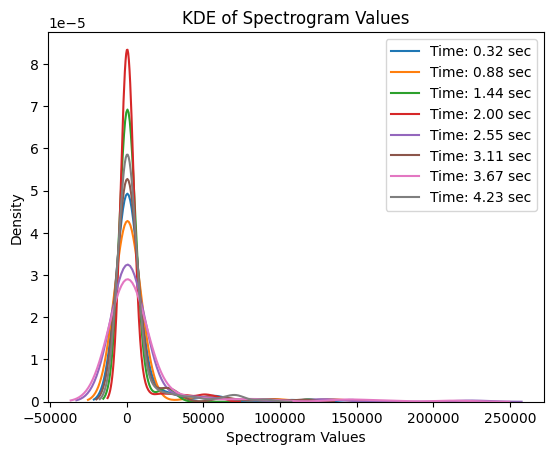

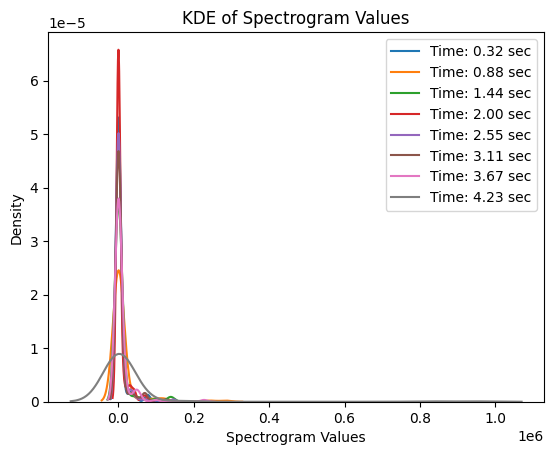

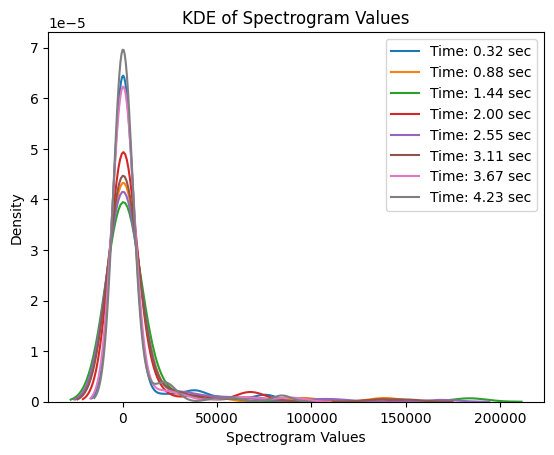

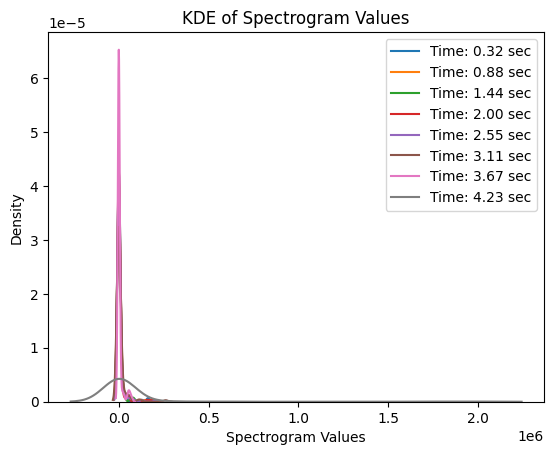

In [28]:
for i in range(5): 
    f, t, Sxx = signal.spectrogram(data_seg[i, :], fs=fs)
    for time_idx in range(len(t)):
    # Extract Sxx values for each timestamp and flatten them
        sxx_values = Sxx[:, time_idx]

        # KDE plot for the flattened Sxx values
        sns.kdeplot(sxx_values, label=f'Time: {t[time_idx]:.2f} sec')

    plt.ylabel('Density')
    plt.xlabel('Spectrogram Values')
    plt.title('KDE of Spectrogram Values')
    plt.legend()
    plt.show()

(129, 8)

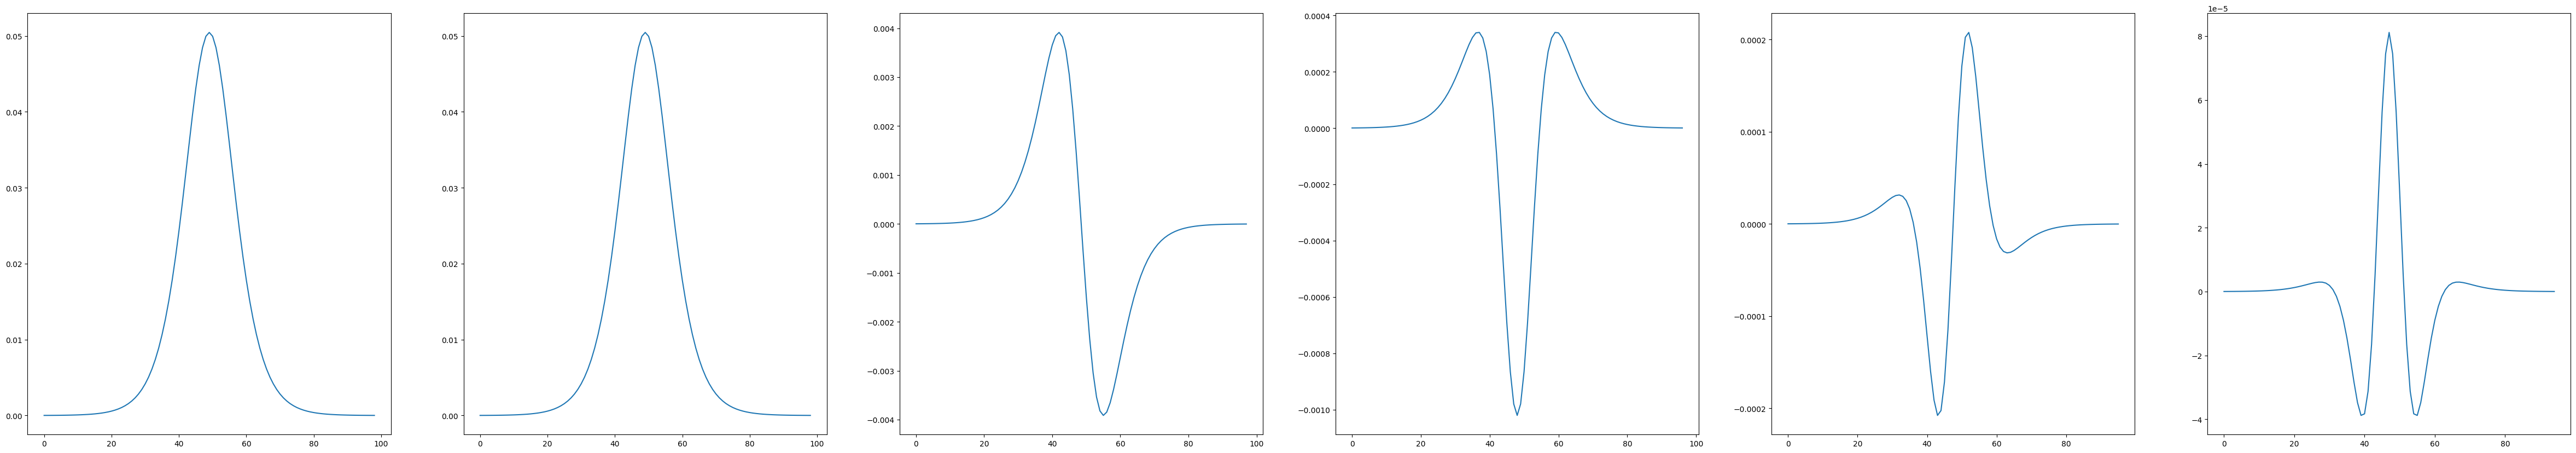

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
x = np.linspace(-10, 10, 100)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def get_n_diff(y, n):
#     print("N: ", n)
    if n <= 1: 
        return np.diff(y)
    else: 
        return np.diff(get_n_diff(y, n-1))
    
y = sigmoid(x)

N = 6
fig = plt.figure(figsize=(N * 10, 10))
gs = GridSpec(nrows=1, ncols=N)
for i in range(N): 
    ax = fig.add_subplot(gs[i])
    ax.plot(get_n_diff(y, i))
    